# DLA

## witten and sender method(random walk method)

## PNN=1

Pnn = 1
The number of particle in cluster is 4000
The simulate cost 91.65235590934753s


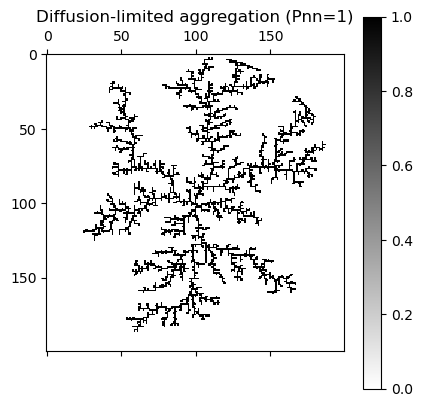

In [ ]:
### import #########################
import numpy as np
import matplotlib.pyplot as plt
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters
Pnn = 1
grid_size = 200
num_particles = 4000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Place the initial seed in the center
center = grid_size // 2
grid[center, center] = 1
##############################################





# function to randomly generate a particle at random pos(x,y)
# acctually not be implemented to save run time !!!
def random_generate():
	angle = 2 * np.pi * np.random.rand()
	x = center + int((Rmax+5) * np.cos(angle))
	y = center + int((Rmax+5) * np.sin(angle))
	return x,y

# function to estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
# acctually not be implemented to save run time !!!
def in_bounds(x, y):

	if(0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
		and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax)):

		return True
	return False

# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		return True
	return False

# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
	global Rmax
	global particlecount

	# ensure there is num_particles in the cluster
	while( particlecount < num_particles ):

		#randomly generate a particle at random pos(x,y)
		angle = 2 * np.pi * np.random.rand()
		x = center + int((Rmax+5) * np.cos(angle))
		y = center + int((Rmax+5) * np.sin(angle))


		Notkill = True
		FLAG = True
		# simulate the process of random walk
		while FLAG:

			# random walk
			rand = int(4 * np.random.random())
			if(rand == 0):
				x, y = x-1, y
			elif(rand == 1):
				x, y = x+1, y
			elif(rand == 2):
				x, y = x, y-1
			else:
				x, y = x, y+1

			# estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
			if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
	   			and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax))):

				Notkill  = False
				break


			#  checking of the nearest neighbor sites is started if
			# 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
			if ((x-center)*(x-center)+(y-center)*(y-center)<=(Rmax+2)*(Rmax+2)):



				if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):

					grid[x, y] = 1 # particle aggregated
					Notkill = True
					particlecount += 1

					break

		# if particle is not killed, update Rmax
		if(Notkill):
			if abs(x - center) > Rmax or abs(y - center) > Rmax:
				Rmax = max(abs(x - center), abs(y - center))




# Simulate DLA
dla()

print("Pnn = 1")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
plt.matshow(grid, cmap='binary')
plt.colorbar()
plt.title('Diffusion-limited aggregation (Pnn=1)')
plt.show()


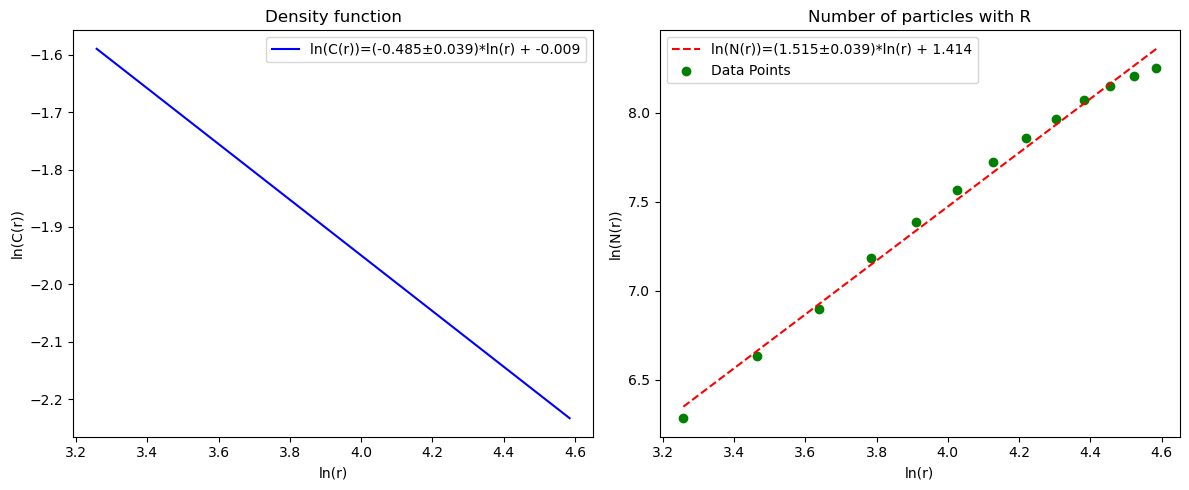

The number of particle in cluster is 4000
The simulate cost 93.78234219551086s
The fractal dimension is 1.8944203044488057 ± -0.02149696907355439


In [ ]:
## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



### colorful diagram

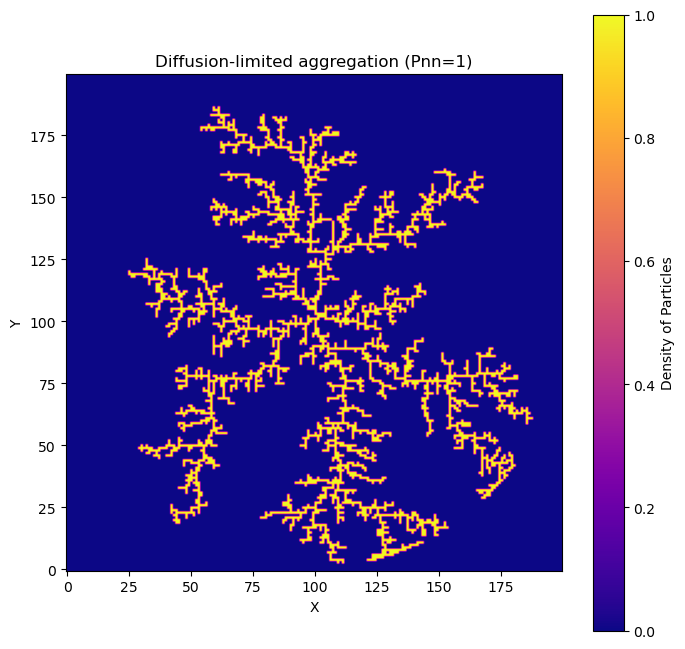

In [ ]:
import matplotlib.pyplot as plt
import time# Plotting
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='plasma', origin='lower')
plt.colorbar(label='Density of Particles')
plt.title('Diffusion-limited aggregation (Pnn=1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_facecolor('black')  # Set background color
plt.show()


## PNN=0.3

The number of particle in cluster is 4000
The simulate cost 144.03169798851013s


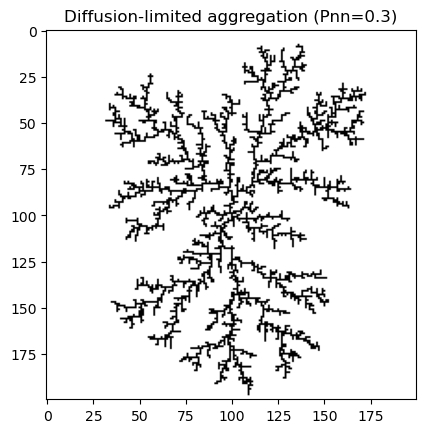

In [ ]:
##############Initialization##################
# initialize Parameters
Pnn = 0.3
grid_size = 200
num_particles = 4000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Place the initial seed in the center
center = grid_size // 2
grid[center, center] = 1
#############################################

# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		if(np.random.rand()<Pnn):
			return True
	return False

# Simulate DLA
dla()


print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
plt.imshow(grid, cmap='binary')
plt.title('Diffusion-limited aggregation (Pnn=0.3)')
plt.show()


np.save(f"grid03_{3}.npy", grid)

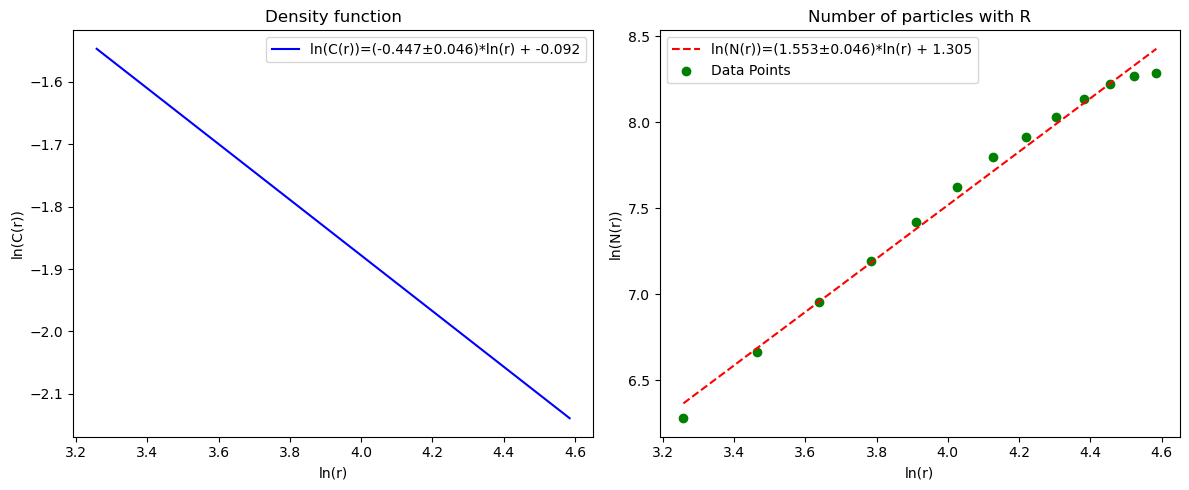

The number of particle in cluster is 4000
The simulate cost 146.1470377445221s
The fractal dimension is 1.9028225246393 ± -0.025293090549119025


In [ ]:
## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



## considering PNN and PSNN

Pnn = 0.3,Psnn=0.15
The number of particle in cluster is 4000
The simulate cost 93.82323575019836s


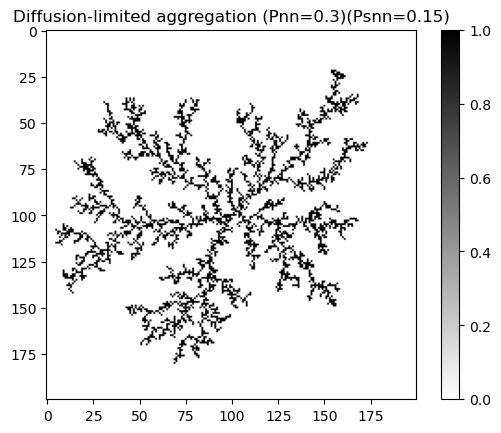

In [ ]:
### import #########################
import numpy as np
import matplotlib.pyplot as plt
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters
Pnn = 0.3
Psnn = 0.5*Pnn
grid_size = 200
num_particles = 4000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Place the initial seed in the center
center = grid_size // 2
grid[center, center] = 1
##############################################





# function to randomly generate a particle at random pos(x,y)
# acctually not be implemented to save run time !!!
def random_generate():
	angle = 2 * np.pi * np.random.rand()
	x = center + int((Rmax+5) * np.cos(angle))
	y = center + int((Rmax+5) * np.sin(angle))
	return x,y

# function to estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
# acctually not be implemented to save run time !!!
def in_bounds(x, y):

	if(0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
		and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax)):

		return True
	return False

# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if(grid[x+1][y+1] == 1) or (grid[x+1][y-1] == 1) or (grid[x-1][y-1] == 1) or (grid[x-1][y+1] == 1):
		if(np.random.rand()<Psnn):
			return True

	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		if(np.random.rand()<Pnn):
			return True

	return False


# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
	global Rmax
	global particlecount

	# ensure there is num_particles in the cluster
	while( particlecount < num_particles ):

		#randomly generate a particle at random pos(x,y)
		angle = 2 * np.pi * np.random.rand()
		x = center + int((Rmax+5) * np.cos(angle))
		y = center + int((Rmax+5) * np.sin(angle))


		Notkill = True
		FLAG = True
		# simulate the process of random walk
		while FLAG:

			# random walk
			rand = int(4 * np.random.random())
			if(rand == 0):
				x, y = x-1, y
			elif(rand == 1):
				x, y = x+1, y
			elif(rand == 2):
				x, y = x, y-1
			else:
				x, y = x, y+1

			# estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
			if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
	   			and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax))):

				Notkill  = False
				break


			#  checking of the nearest neighbor sites is started if
			# 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
			if ((x-center)*(x-center)+(y-center)*(y-center)<=(Rmax+2)*(Rmax+2)):


				if (aggregate(x,y)):

					grid[x, y] = 1 # particle aggregated
					Notkill = True
					particlecount += 1

					break

		# if particle is not killed, update Rmax
		if(Notkill):
			if abs(x - center) > Rmax or abs(y - center) > Rmax:
				Rmax = max(abs(x - center), abs(y - center))


# Simulate DLA
dla()

print("Pnn = 0.3,Psnn=0.15")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
plt.imshow(grid, cmap='binary')
plt.colorbar()
plt.title('Diffusion-limited aggregation (Pnn=0.3)(Psnn=0.15)')
plt.show()

np.save(f"grid_snn_nn_{5}.npy", grid)

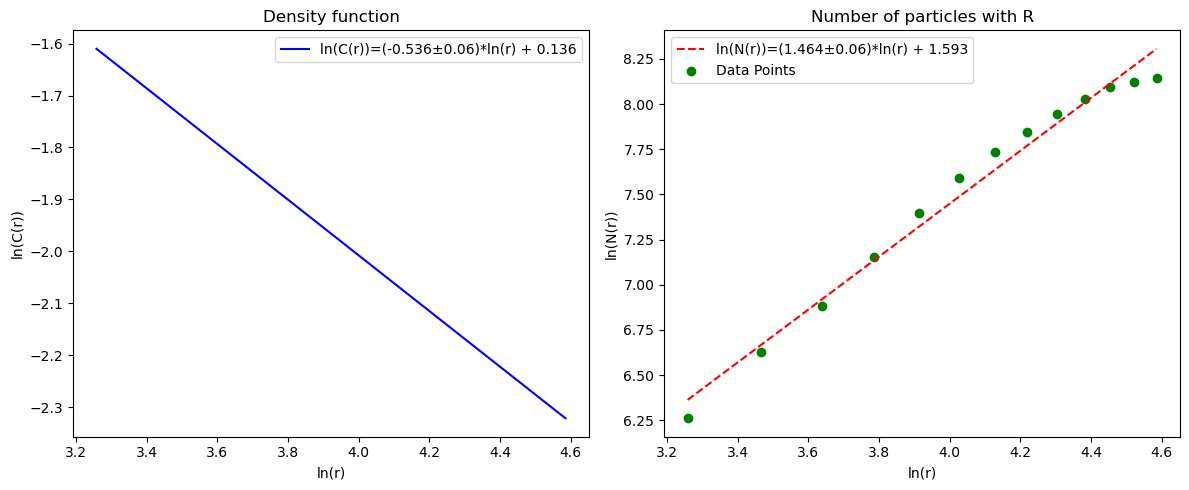

The number of particle in cluster is 4000
The simulate cost 96.15806245803833s
The fractal dimension is 1.8833621455986187 ± -0.0332335107142422


In [ ]:
## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



## coloured picture

Pnn = 1
The number of particle in cluster is 4000
The simulate cost 36.51006078720093s


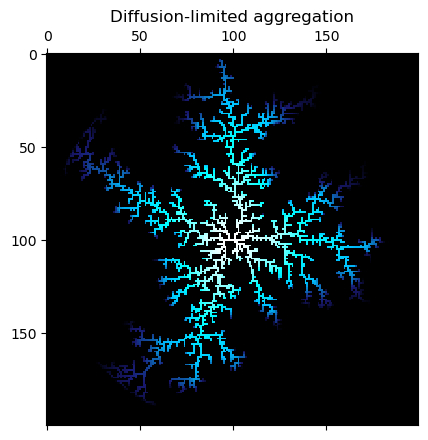

In [ ]:
"""This file is used to color the cluster

Paramter:
	grid: a simple lattice (cluster)
	grid_size: the length of grid length
	Rmax:  the maximum distance from the seed to the outermost particle
	particlecount: the number of particle in cluster
	Pnn: the sticking probability at the nearest neighbor sites
	Psnn: the sticking probability at the second nearest neighbor sites

"""
### import #########################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters
Pnn = 1
grid_size = 200
num_particles = 4000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size))

# Place the initial seed in the center
center = grid_size // 2
grid[center, center] = 1
##############################################



# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		return True
	return False

# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
	global Rmax
	global particlecount

	# ensure there is num_particles in the cluster
	while( particlecount < num_particles ):

		#randomly generate a particle at random pos(x,y)
		angle = 2 * np.pi * np.random.rand()
		#randR = int(grid_size * np.random.rand())
		x = center + int((Rmax+5) * np.cos(angle))
		y = center + int((Rmax+5) * np.sin(angle))


		Notkill = True
		FLAG = True
		# simulate the process of random walk
		while FLAG:

			# random walk
			rand = int(4 * np.random.random())
			if(rand == 0):
				x, y = x-1, y
			elif(rand == 1):
				x, y = x+1, y
			elif(rand == 2):
				x, y = x, y-1
			else:
				x, y = x, y+1

			# estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
			if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
	   			and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax))):

				Notkill  = False
				break


			#  checking of the nearest neighbor sites is started if
			# 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
			if ((x-center)*(x-center)+(y-center)*(y-center)<=(Rmax+2)*(Rmax+2)):



				if (grid[x+1][y] != 0) or (grid[x][y+1] != 0) or (grid[x-1][y] != 0) or (grid[x][y-1] != 0):

					grid[x, y] = (num_particles-particlecount)/num_particles # particle aggregated
					Notkill = True
					particlecount += 1

					break

		# if particle is not killed, update Rmax
		if(Notkill):
			if abs(x - center) > Rmax or abs(y - center) > Rmax:
				Rmax = max(abs(x - center), abs(y - center))




# Simulate DLA
dla()


print("Pnn = 1")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
cmap = LinearSegmentedColormap.from_list("newocean",["black",'midnightblue','deepskyblue','cyan','white'])
plt.matshow(grid, cmap=cmap)
plt.title('Diffusion-limited aggregation')
plt.show()

## different probablity in different directions

Pnn = 1
The number of particle in cluster is 4000
The simulate cost 67.54048442840576s


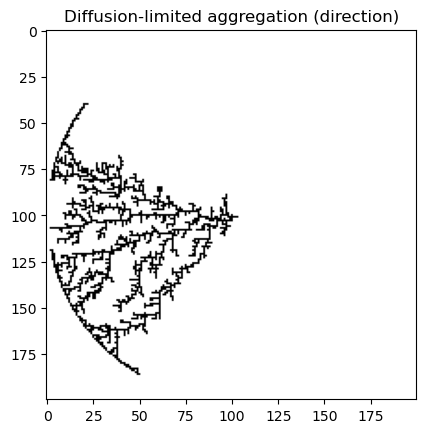

In [ ]:
"""This file is used to simulate direction with different possibility

Paramter:
	grid: a simple lattice (cluster)
	grid_size: the length of grid length
	Rmax:  the maximum distance from the seed to the outermost particle
	particlecount: the number of particle in cluster
	Pnn: the sticking probability at the nearest neighbor sites
	Psnn: the sticking probability at the second nearest neighbor sites

"""
### import #########################
import numpy as np
import matplotlib.pyplot as plt
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters

# Example A
Pleft = 0.1
Pup = 0.3
Pdown = 0.3
Pright = 0.3

# Exmaple B
# Pleft = 0.1
# Pup = 0.4
# Pdown = 0.4
# Pright = 0.1

grid_size = 200
num_particles = 4000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Place the initial seed in the center
center = grid_size // 2
grid[center, center] = 1
##############################################





# function to randomly generate a particle at random pos(x,y)
# acctually not be implemented to save run time !!!
def random_generate():
	angle = 2 * np.pi * np.random.rand()
	x = center + int((Rmax+5) * np.cos(angle))
	y = center + int((Rmax+5) * np.sin(angle))
	return x,y

# function to estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
# acctually not be implemented to save run time !!!
def in_bounds(x, y):

	if(0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
		and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax)):

		return True
	return False

# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		return True
	return False


# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
	global Rmax
	global particlecount

	# ensure there is num_particles in the cluster
	while( particlecount < num_particles ):

		#randomly generate a particle at random pos(x,y)
		angle = 2 * np.pi * np.random.rand()
		x = center + int((Rmax+5) * np.cos(angle))
		y = center + int((Rmax+5) * np.sin(angle))


		Notkill = True
		FLAG = True
		# simulate the process of random walk
		while FLAG:

			# random walk
			rand = int(10 * np.random.random())
			if(rand == 0 or rand == 1 or rand == 2):
				x, y = x-1, y #up
			elif(rand == 3 or rand == 4 or rand == 5):
				x, y = x+1, y #down
			elif(rand == 6 ):
				x, y = x, y-1 #left
			else:
				x, y = x, y+1 #right

			# estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
			if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
	   			and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax))):

				Notkill  = False
				break


			#  checking of the nearest neighbor sites is started if
			# 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
			if ((x-center)*(x-center)+(y-center)*(y-center)<=(Rmax+2)*(Rmax+2)):


				if (aggregate(x,y)):

					grid[x, y] = 1 # particle aggregated
					Notkill = True
					particlecount += 1

					break

		# if particle is not killed, update Rmax
		if(Notkill):
			if abs(x - center) > Rmax or abs(y - center) > Rmax:
				Rmax = max(abs(x - center), abs(y - center))


# Simulate DLA
dla()

print("Pnn = 1")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
plt.imshow(grid, cmap='binary')
plt.title('Diffusion-limited aggregation (direction)')
plt.show()

np.save(f"grid_direction_1_{5}.npy", grid)

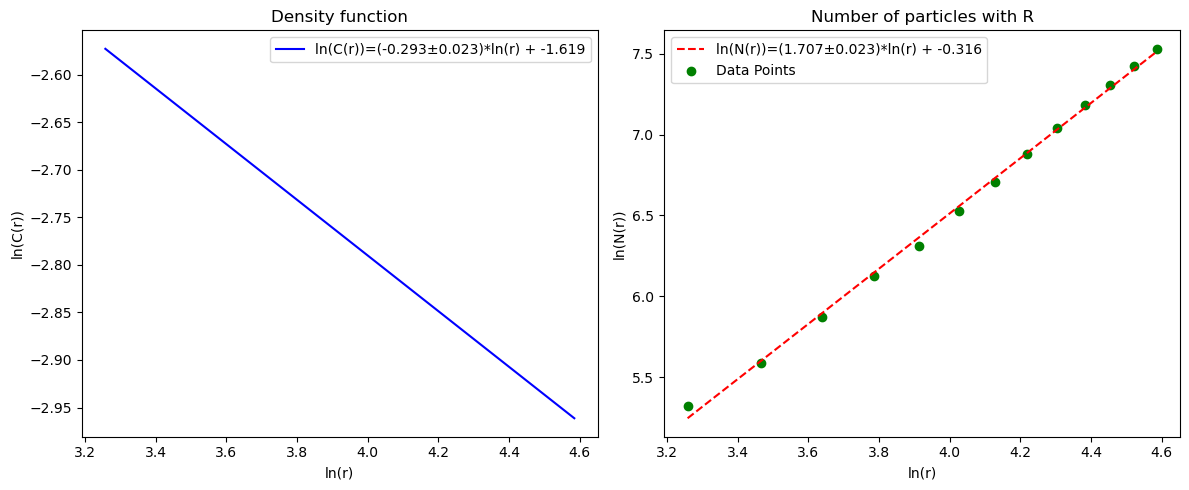

The number of particle in cluster is 4000
The simulate cost 69.58704566955566s
The fractal dimension is 1.9363095322134776 ± -0.012660642455881463


In [ ]:
## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



## 2 seeds

Pnn = 1
The number of particle in cluster is 4000
The simulate cost 23.24560284614563s


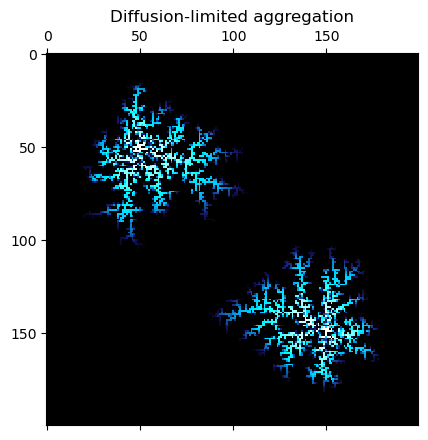

In [ ]:
"""This file puts 2 seeds

Paramter:
	grid: a simple lattice (cluster)
	grid_size: the length of grid length
	Rmax:  the maximum distance from the seed to the outermost particle
	particlecount: the number of particle in cluster
	Pnn: the sticking probability at the nearest neighbor sites
	Psnn: the sticking probability at the second nearest neighbor sites

"""
### import #########################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters
Pnn = 1
grid_size = 200
num_particles = 4000
Rmax1 = 3
Rmax2 = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size))

# Place the initial seed
center = grid_size // 2
center1 = grid_size // 4
center2 = 3*grid_size // 4
grid[center1, center1] = 1
grid[center2, center2] = 1
##############################################



# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		return True
	return False

# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
	global Rmax1
	global Rmax2
	global particlecount

	# ensure there is num_particles in the cluster
	while( particlecount < num_particles ):
		angle = 2 * np.pi * np.random.rand()
		randp = int(2 * np.random.random())
		randR = int(grid_size * np.random.random())

		if(randp == 0):
			x = center1 + int((randR+5) * np.cos(angle))
			y = center1 + int((randR+5) * np.sin(angle))
		else:
			x = center2 + int((randR+5) * np.cos(angle))
			y = center2 + int((randR+5) * np.sin(angle))

		Notkill = True
		FLAG = True
		# simulate the process of random walk
		while Notkill:

			# random walk
			rand = int(4 * np.random.random())
			if(rand == 0):
				x, y = x-1, y
			elif(rand == 1):
				x, y = x+1, y
			elif(rand == 2):
				x, y = x, y-1
			else:
				x, y = x, y+1

			# estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
			if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) ):#\
	   			#and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax))):

				Notkill  = False
				break


			#  checking of the nearest neighbor sites is started if
			# 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
			if (True):



				if (grid[x+1][y] != 0) or (grid[x][y+1] != 0) or (grid[x-1][y] != 0) or (grid[x][y-1] != 0):

					grid[x, y] = (num_particles-particlecount)/num_particles # particle aggregated
					Notkill = True
					particlecount += 1

					break

		# if particle is not killed, update Rmax
		if(Notkill):
			if randp == 0:
				if abs(x - center1) > Rmax1 or abs(y - center1) > Rmax1:
					Rmax1 = max(abs(x - center1), abs(y - center1))
			else:
				if abs(x - center2) > Rmax2 or abs(y - center2) > Rmax2:
					Rmax2 = max(abs(x - center2), abs(y - center2))




# Simulate DLA
dla()


print("Pnn = 1")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
cmap = LinearSegmentedColormap.from_list("newocean",["black",'midnightblue','deepskyblue','cyan','white'])
cmap.set_under(color='black')
plt.matshow(grid, cmap=cmap)
plt.title('Diffusion-limited aggregation')
plt.show()


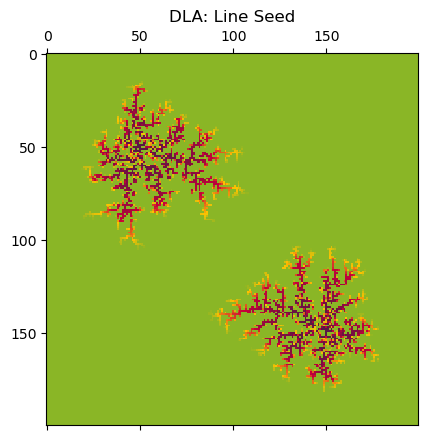

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colors
colors = ['#8AB626', '#FFC300', '#C70039', '#900C3F', '#581845']  # Example colors, you can change them

# Create a colormap
cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

# Plot the result
plt.matshow(grid, cmap=cmap)
plt.title('DLA: Line Seed')
plt.show()



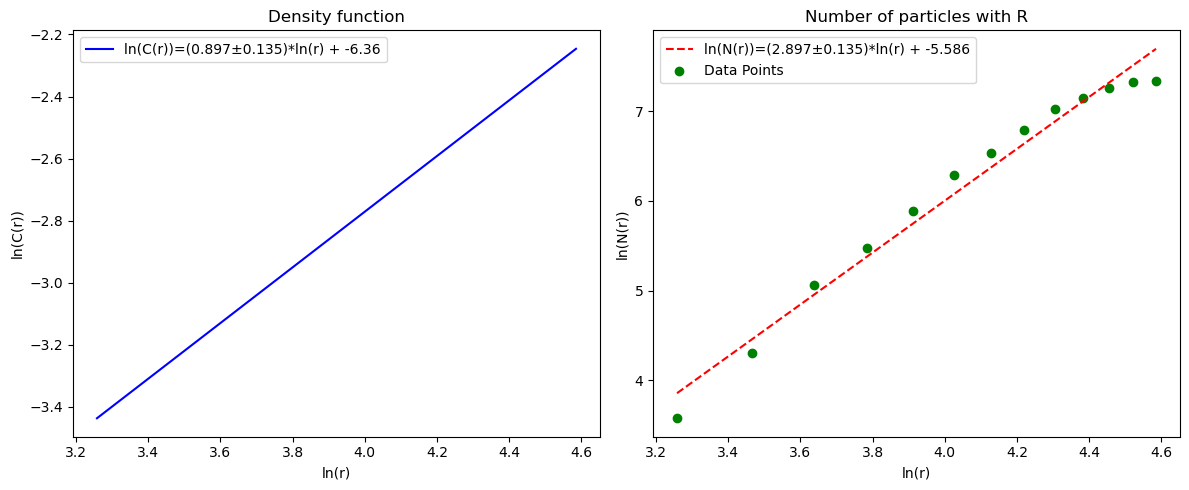

The number of particle in cluster is 4000
The simulate cost 48.068313121795654s
The fractal dimension is 2.1952463693991993 ± -0.07454889069115654


In [ ]:
## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



## 4 seeds

Pnn = 1
The number of particle in cluster is 4000
The simulate cost 13.862662553787231s


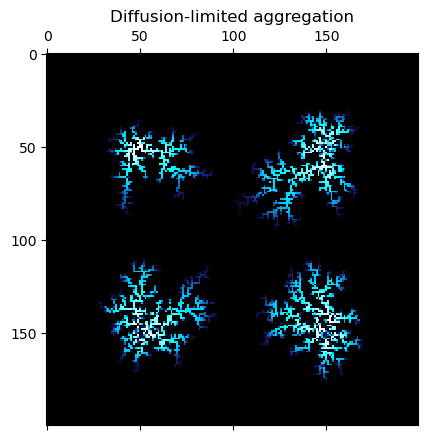

In [ ]:
"""This file put 4 seeds

Paramter:
	grid: a simple lattice (cluster)
	grid_size: the length of grid length
	Rmax:  the maximum distance from the seed to the outermost particle
	particlecount: the number of particle in cluster
	Pnn: the sticking probability at the nearest neighbor sites
	Psnn: the sticking probability at the second nearest neighbor sites

"""
### import #########################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters
Pnn = 1
grid_size = 200
num_particles = 4000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size))

# Place the initial seed
center = grid_size // 2
center1 = grid_size // 4
center2 = 3*grid_size // 4
grid[center1, center1] = 1
grid[center2, center2] = 1
grid[center1, center2] = 1
grid[center2, center1] = 1
allx = 2*center1 + 2*center2
ally = 2*center2 + 2*center1
particlecount = 4
##############################################



# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		return True
	return False

# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
	global Rmax
	global particlecount
	global ally
	global allx

	# ensure there is num_particles in the cluster
	while( particlecount < num_particles ):
		angle = 2 * np.pi * np.random.rand()
		randp = int(4 * np.random.random())
		randR = int(grid_size * np.random.random())

		if(randp == 0):
			x = center + int((randR) * np.cos(angle))
			y = center + int((randR) * np.sin(angle))
		elif(randp == 1):
			x = center2 + int((randR) * np.cos(angle))
			y = center2 + int((randR) * np.sin(angle))
		elif(randp == 2):
			x = center1 + int((randR) * np.cos(angle))
			y = center2 + int((randR) * np.sin(angle))
		else:
			x = center2 + int((randR) * np.cos(angle))
			y = center1 + int((randR) * np.sin(angle))


		Notkill = True
		FLAG = True
		# simulate the process of random walk
		while Notkill:

			# random walk
			rand = int(4 * np.random.random())
			if(rand == 0):
				x, y = x-1, y
			elif(rand == 1):
				x, y = x+1, y
			elif(rand == 2):
				x, y = x, y-1
			else:
				x, y = x, y+1

			# estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
			if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) ):#\
	   			#and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax))):

				Notkill  = False
				break


			#  checking of the nearest neighbor sites is started if
			# 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
			if (True):



				if (grid[x+1][y] != 0) or (grid[x][y+1] != 0) or (grid[x-1][y] != 0) or (grid[x][y-1] != 0):

					grid[x, y] = (num_particles-particlecount)/num_particles # particle aggregated
					allx += x
					ally += y
					Notkill = True
					particlecount += 1

					break

		# if particle is not killed, update Rmax
		if(Notkill):
			if abs(allx/particlecount - center) > Rmax or abs(ally/particlecount - center) > Rmax:
				Rmax = max(abs(allx/particlecount - center), abs(ally/particlecount - center))




# Simulate DLA
dla()


print("Pnn = 1")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
cmap = LinearSegmentedColormap.from_list("newocean",["black",'midnightblue','deepskyblue','cyan','white'])
cmap.set_under(color='black')
plt.matshow(grid, cmap=cmap)
plt.title('Diffusion-limited aggregation')
plt.show()



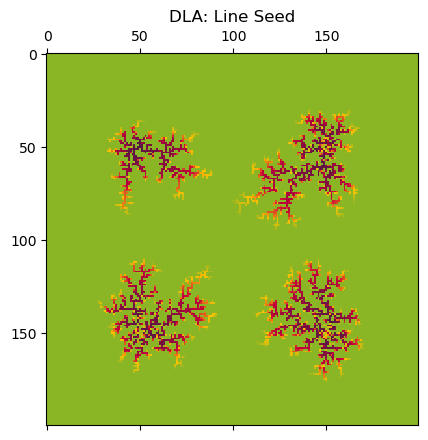

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colors
colors = ['#8AB626', '#FFC300', '#C70039', '#900C3F', '#581845']  # Example colors, you can change them

# Create a colormap
cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

# Plot the result
plt.matshow(grid, cmap=cmap)
plt.title('DLA: Line Seed')
plt.show()



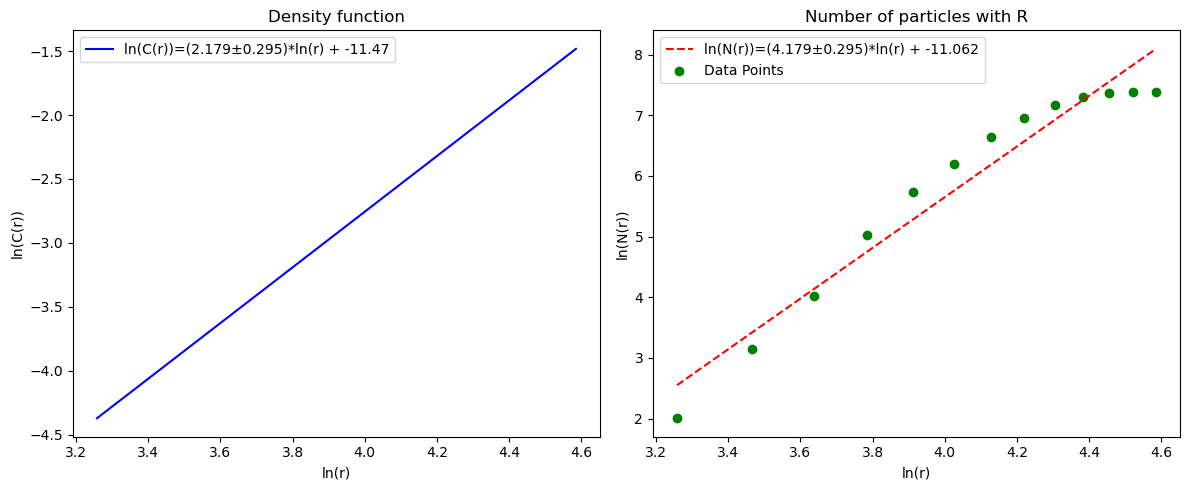

The number of particle in cluster is 4000
The simulate cost 28.49781060218811s
The fractal dimension is 2.4741017626653585 ± -0.1627384942943572


In [ ]:
## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



## Seed as line

Pnn = 1
The number of particle in cluster is 4000
The simulate cost 31.444958209991455s


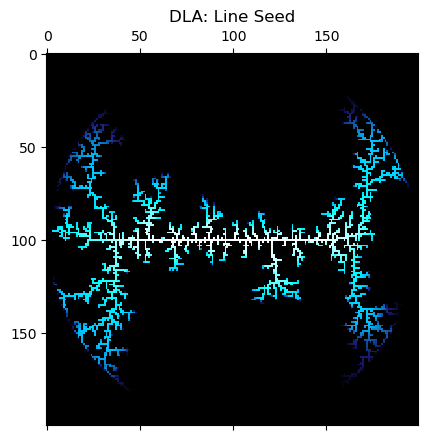

In [ ]:

"""This file put seeds as a line

Paramter:
	grid: a simple lattice (cluster)
	grid_size: the length of grid length
	Rmax:  the maximum distance from the seed to the outermost particle
	particlecount: the number of particle in cluster
	Pnn: the sticking probability at the nearest neighbor sites
	Psnn: the sticking probability at the second nearest neighbor sites

"""
### import #########################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters
Pnn = 1
grid_size = 200
num_particles = 4000
Rmax = 3
particlecount = 0
lineWidth = 100
# Initialize the grid
grid = np.zeros((grid_size, grid_size))

# Place the initial seed
center = grid_size // 2
grid[int(grid_size/2), int((grid_size/2)-(lineWidth/2)):int((grid_size/2)+(lineWidth/2)+1)] = 1
##############################################



# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		return True
	return False

# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
	global Rmax
	global particlecount

	# ensure there is num_particles in the cluster
	while( particlecount < num_particles ):

		#randomly generate a particle at random pos(x,y)
		angle = 2 * np.pi * np.random.rand()
		x = center + int((Rmax+5) * np.cos(angle))
		y = center + int((Rmax+5) * np.sin(angle))


		Notkill = True
		FLAG = True
		# simulate the process of random walk
		while FLAG:

			# random walk
			rand = int(4 * np.random.random())
			if(rand == 0):
				x, y = x-1, y
			elif(rand == 1):
				x, y = x+1, y
			elif(rand == 2):
				x, y = x, y-1
			else:
				x, y = x, y+1

			# estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
			if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
	   			and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax))):

				Notkill  = False
				break


			#  checking of the nearest neighbor sites is started if
			# 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
			if ((x-center)*(x-center)+(y-center)*(y-center)<=(Rmax+2)*(Rmax+2)):



				if (grid[x+1][y] != 0) or (grid[x][y+1] != 0) or (grid[x-1][y] != 0) or (grid[x][y-1] != 0):

					grid[x, y] = (num_particles-particlecount)/num_particles # particle aggregated
					Notkill = True
					particlecount += 1

					break

		# if particle is not killed, update Rmax
		if(Notkill):
			if abs(x - center) > Rmax or abs(y - center) > Rmax:
				Rmax = max(abs(x - center), abs(y - center))




# Simulate DLA
dla()


print("Pnn = 1")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

#Plot the result
cmap = LinearSegmentedColormap.from_list("newocean",["black",'midnightblue','deepskyblue','cyan','white'])
cmap.set_under(color='black')
plt.matshow(grid, cmap=cmap)
plt.title('DLA: Line Seed')
plt.show()

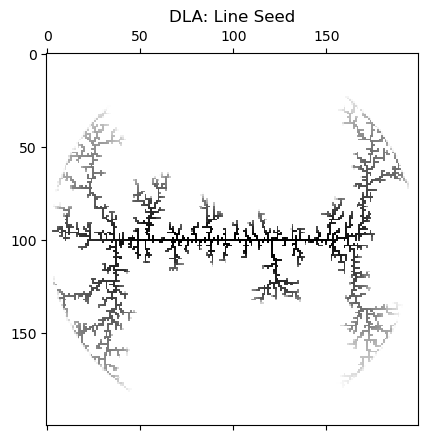

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colors
colors = ['#8AB626', '#FFC300', '#C70039', '#900C3F', '#581845']  # Example colors, you can change them

# Create a colormap
#cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
cmap='binary'
# Plot the result
plt.matshow(grid, cmap=cmap)
plt.title('DLA: Line Seed')
plt.show()



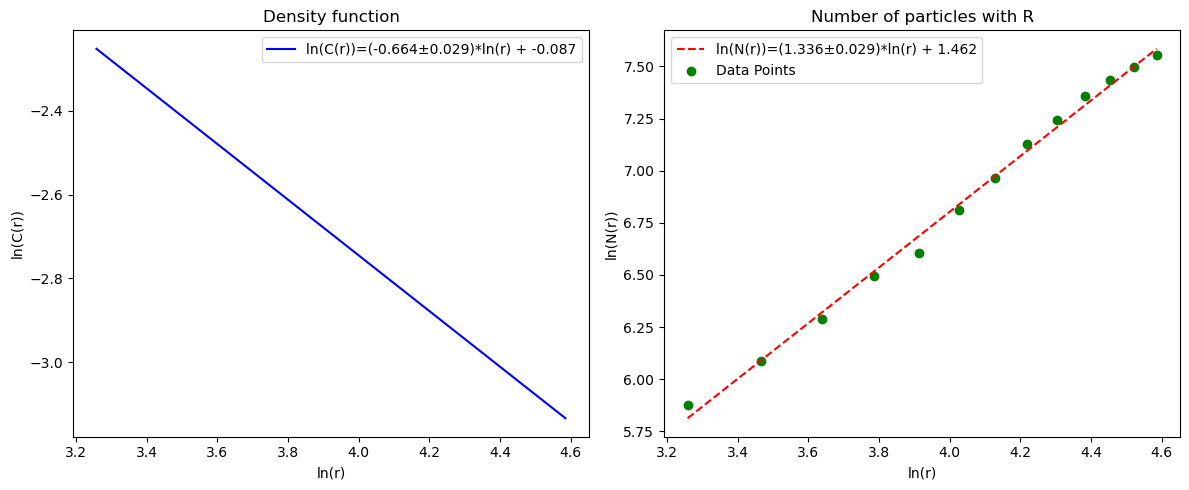

The number of particle in cluster is 4000
The simulate cost 63.504164934158325s
The fractal dimension is 1.8553960589266636 ± -0.015732777773594525


In [ ]:
## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



## ln(c) n ln(N)

<Figure size 800x800 with 0 Axes>

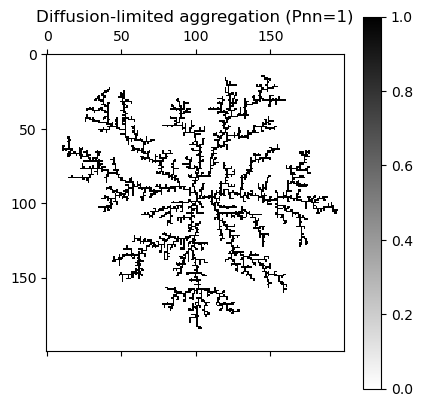

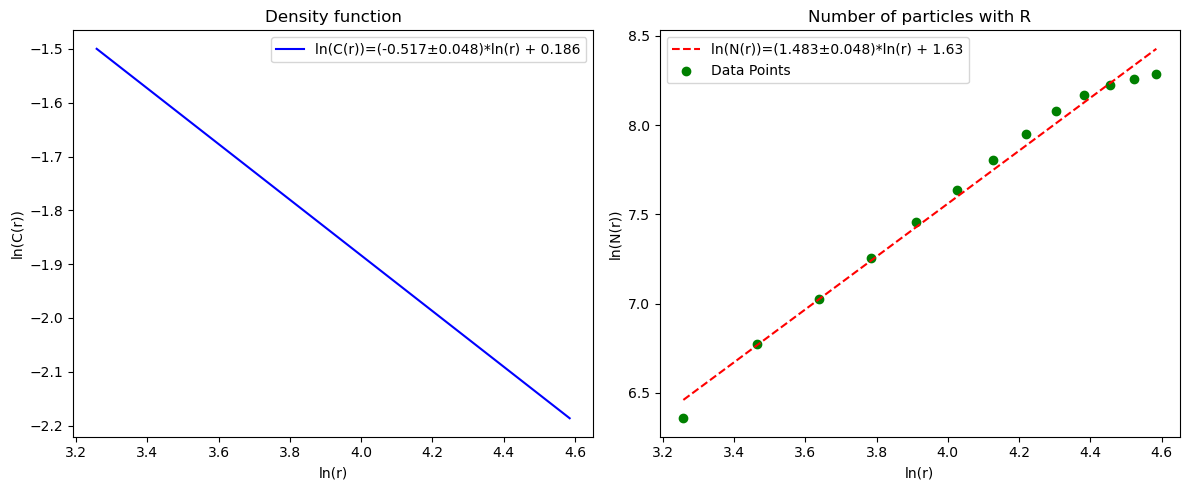

The number of particle in cluster is 4000
The simulate cost 44.88096308708191s
The fractal dimension is 1.887395355018514 ± -0.026376464044224834


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

##############Initialization##################
# initialize Parameters
Pnn = 1
grid_size = 200
center = grid_size // 2
num_particles = 4000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Place the initial seed in the center
grid[center, center] = 1
##############################################

# function to estimatethat whether a particle aggregate
def aggregate(x, y):
    if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
        if(np.random.rand()<Pnn):

            return True
    return False

# simulation of Diffusion-limited aggregation
def dla():
    global Rmax
    global particlecount

    while particlecount < num_particles:
        angle = 2 * np.pi * np.random.rand()
        x = center + int((Rmax+5) * np.cos(angle))
        y = center + int((Rmax+5) * np.sin(angle))

        Notkill = True
        FLAG = True

        while FLAG:
            rand = int(4 * np.random.random())
            if rand == 0:
                x, y = x-1, y
            elif rand == 1:
                x, y = x+1, y
            elif rand == 2:
                x, y = x, y-1
            else:
                x, y = x, y+1

            if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
                and ((x-center)*(x-center)+(y-center)*(y-center) < (3*Rmax)*(3*Rmax))):
                Notkill = False
                break

            if ((x-center)*(x-center)+(y-center)*(y-center) <= (Rmax+2)*(Rmax+2)):
                if aggregate(x, y):
                    grid[x, y] = 1
                    Notkill = True
                    particlecount += 1
                    break

        if Notkill:
            if abs(x - center) > Rmax or abs(y - center) > Rmax:
                Rmax = max(abs(x - center), abs(y - center))

# Simulate DLA
dla()

# Plot the DLA result
plt.figure(figsize=(8, 8))
plt.matshow(grid, cmap='binary')
plt.colorbar()
plt.title('Diffusion-limited aggregation (Pnn=1)')
plt.show()

## Second code ##
# Grid parameters
grid_num = 5
step = 6
R_list = np.arange(26, grid_size // 2 - 1, step)
lnR_list = np.log(R_list)

# Valid points to calculate linear fit function
valid = 16  # Pnn = 0.3

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []

# Simulate grid data (use the grid generated from the first code)
for i in range(grid_num):
    grid_array[i] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center - R, center + R + 1):
            for j in range(center - R, center + R + 1):
                if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                    count += grid[i][j]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 2
    b = np.log(coeff[0] / (2 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Find mean grid to plot scatter figure
grid_mean = np.mean(grid_array, axis=0)
count_list = []
for R in R_list:
    count = 0
    for i in range(center - R, center + R + 1):
        for j in range(center - R, center + R + 1):
            if ((i - center) ** 2 + (j - center) ** 2 <= R ** 2):
                count += grid_mean[i][j]
    count_list.append(count)
count_list = np.log(count_list)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")
# Calculate fractal dimension and errors
fractal_dimension = 2 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")



## 2D animation

In [ ]:
import random
import numpy as np
import pygame
class Application:
    def __init__(self):
        self.size=self.width, self.height= 840, 680
        self.startX,self.startY = round(self.width/2),round(self.height/2)
        self.X, self.Y = self.startX,self.startY
        self.minX,self.minY = self.X,self.Y
        self.maxX,self.maxY = self.X,self.Y
        self.padSize = 20
        self.domainMinX = self.startX - self.padSize
        self.domainMaxX = self.startX + self.padSize
        self.domainMinY = self.startY - self.padSize
        self.domainMaxY = self.startY + self.padSize
        self.crystalColour = 0x808080
        self.displaySurface= None
        self.pixelArray = None
        #self.pixelColour = None
        self.updateFlag = False

    def on_init(self):
        pygame.init()
        pygame.display.set_caption("Random Walk")
        self.displaySurface = pygame.display.set_mode(self.size)
        self.pixelArray = pygame.PixelArray(self.displaySurface)
        #self.pixelColour = (255, 0, 0)
        self.isRunning = True

        self.pixelArray[self.startX,self.startY + 10] = self.crystalColour
        pygame.display.update()
    def on_event(self, event):
        if event.type==pygame.QUIT:
            self.isRunning = False
    def on_loop(self):
        newDir = random.choice(((0,1), (0,-1), (1,0), (-1,0),(1,-1),(-1,1),(1,1),(-1,-1)))
        dX,dY =newDir
        newX = self.X + dX
        newY = self.Y + dY
        if (newX < self.domainMinX):
            newX = self.domainMaxX
        if (newX > self.domainMaxX):
            newX = self.domainMinX
        if (newY < self.domainMinY):
            newY = self.domainMaxY
        if (newY > self.domainMaxY):
            newY = self.domainMinY



        if (self.pixelArray[newX, newY] == self.crystalColour):
            self.updateFlag = True
            if (self.X < self.minX):
                self.minX = self.X
            if (self.X > self.maxX):
                self.maxX = self.X
            if (self.Y < self.minY):
                self.minY = self.Y
            if (self.Y > self.maxY):
                self.maxY = self.Y
            self.domainMinX = max([self.minX -self.padSize,1])
            self.domainMaxX = min([self.maxX +self.padSize,self.width - 1])
            self.domainMiny = max([self.minY -self.padSize,1])
            self.domainMaxY = min([self.maxY + self.padSize,self.height -1])



        else:
            self.updateFlag = False
            self.X,self.Y=newX,newY
    def on_render(self):
        if self.updateFlag:
            self.pixelArray[self.X,self.Y]=self.crystalColour
            pygame.display.update()
            self.updateFlag = False
            #self.X, self.Y = self.startX,self.startY

            newSide = random.choice((1,2,3,4))
            if (newSide==1):
                self.X = self.domainMinX
                self.Y = int(random.uniform(self.domainMinY,self.domainMaxY))
            elif (newSide==2):
                self.X=int(random.uniform(self.domainMinX,self.domainMaxX))
                self.Y=self.domainMinY
            elif (newSide==3):
                self.X = self.domainMaxX
                self.Y = int(random.uniform(self.domainMinY,self.domainMaxY))
            else:
                self.X=int(random.uniform(self.domainMinX,self.domainMaxX))
                self.Y=self.domainMaxY


    def on_execute(self):
        if self.on_init()==False:
            self.isRunning=False
        while self.isRunning:
            for event in pygame.event.get():
                self.on_event(event)
            self.on_loop()
            self.on_render()
        pygame.quit()
if __name__ == "__main__":
    t=Application()
    t.on_execute()

In [ ]:
pip install pygame

     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     --------------------------------------- 0.1/10.8 MB 400.9 kB/s eta 0:00:27
     - -------------------------------------- 0.4/10.8 MB 1.0 MB/s eta 0:00:11
     -- ------------------------------------- 0.6/10.8 MB 1.5 MB/s eta 0:00:07
     --- ------------------------------------ 0.9/10.8 MB 2.1 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/10.8 MB 2.0 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/10.8 MB 2.0 MB/s eta 0:00:05
     ---- -----------


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


still run:0
still run:0
still run:0
still run:0
still run:0
still run:100
still run:200
still run:300
still run:300
still run:400
still run:500
still run:600
still run:700
still run:800
still run:900
still run:1000
still run:1100
still run:1200
still run:1200
still run:1200
still run:1300
still run:1400
still run:1500
still run:1500
still run:1600
still run:1600
still run:1700
still run:1800
still run:1900
still run:2000
still run:2000
still run:2000
still run:2100
still run:2100
still run:2200
still run:2300
still run:2400
still run:2500
still run:2600
still run:2700
still run:2800
still run:2800
still run:2900
still run:3000
still run:3000
still run:3100
still run:3200
still run:3200
still run:3300
still run:3400
still run:3500
still run:3600
still run:3700
still run:3700
still run:3700
still run:3800
still run:3800
still run:3800
still run:3900
still run:3900
still run:4000
still run:4100
still run:4100
still run:4200
still run:4300
still run:4400
still run:4500
still run:4600
still

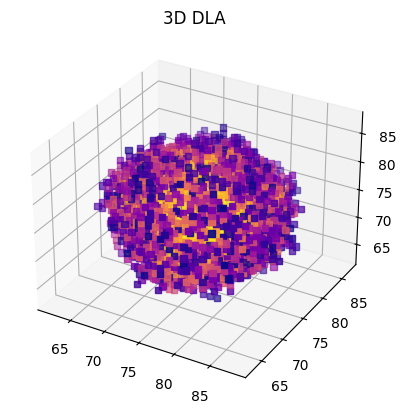

In [ ]:

### import #########################
import numpy as np
import matplotlib.pyplot as plt
import time
####################################

start = time.time()




##############Initialization##################
# initialize Parameters
Pnn = 1
grid_size = 150
num_particles = 5000
Rmax = 3
particlecount = 0

# Initialize the grid
grid = np.zeros((grid_size, grid_size, grid_size))

# Place the initial seed in the center
center = grid_size // 2
grid[center, center, center] = 1
##############################################





# function to randomly generate a particle at random pos(x,y)
# acctually not be implemented to save run time !!!
def random_generate():
	theta = 2 * np.pi * np.random.rand()
	phi = np.pi * np.random.rand()
	x = center + int((Rmax+5) * np.cos(phi)*np.sin(theta))
	y = center + int((Rmax+5) * np.sin(phi)*np.sin(theta))
	z = center + int((Rmax+5) * np.cos(theta))
	return x,y,z

# function to estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
# acctually not be implemented to save run time !!!
def in_bounds(x, y):

	if(0 < x < grid_size - 1 and 0 < y < grid_size - 1) \
		and ((x-center)*(x-center)+(y-center)*(y-center)<(3*Rmax)*(3*Rmax)):

		return True
	return False

# function to estimatethat whether a particle aggregate
def aggregate(x, y):
	if (grid[x+1][y] == 1) or (grid[x][y+1] == 1) or (grid[x-1][y] == 1) or (grid[x][y-1] == 1):
		return True
	return False

# simulation of Diffusion-limited aggregation
def dla():
	# global function to update paramter
    global particlecount
    global Rmax
    interval = range(0,num_particles,100)
	# ensure there is num_particles in the cluster
    while( particlecount < num_particles):

		#randomly generate a particle at random pos(x,y)
        theta = 2 * np.pi * np.random.rand()
        phi = np.pi * np.random.rand()
        x = center + int((Rmax+5) * np.cos(phi)*np.sin(theta))
        y = center + int((Rmax+5) * np.sin(phi)*np.sin(theta))
        z = center + int((Rmax+5) * np.cos(theta))

        if particlecount in interval:
            print(f"still run:{particlecount}")
        Notkill = True
        FLAG = True
        # simulate the process of random walk
        while FLAG:

            # random walk
            rand = int(6 * np.random.random())
            if(rand == 0):
                x, y, z = x-1, y, z
            elif(rand == 1):
                x, y, z = x+1, y, z
            elif(rand == 2):
                x, y, z = x, y-1, z
            elif(rand == 3):
                x, y, z = x, y+1, z
            elif(rand == 4):
                x, y, z = x, y, z+1
            else:
                x, y, z = x, y, z-1

            # estimate that whether a particle should be killed(out of 3*Rmax or out of grid)
            if not ((0 < x < grid_size - 1 and 0 < y < grid_size - 1 and 0 < z < grid_size - 1)): #\
                #and ((x-center)*(x-center)+(y-center)*(y-center)+ (z-center)*(z-center)<(5*Rmax)*(5*Rmax))):

                Notkill  = False
                break


            #  checking of the nearest neighbor sites is started if
            # 	the particle reaches the distance 𝑅𝑚𝑎𝑥 + 2 from the cluster
            if ((x-center)*(x-center)+(y-center)*(y-center)+(z-center)*(z-center)<=(Rmax+2)*(Rmax+2)):



                if (grid[x+1][y][z] != 0) or (grid[x][y+1][z] != 0) or (grid[x-1][y][z] != 0) \
                    or (grid[x][y-1][z] != 0) or (grid[x][y][z+1] != 0) or (grid[x][y][z-1] != 0):

                    grid[x, y, z] = (num_particles-particlecount)/num_particles #1 # particle aggregated
                    Notkill = True
                    particlecount += 1

                    break

        # if particle is not killed, update Rmax
        if(Notkill):
            if abs(x - center) > Rmax or abs(y - center) or abs(z - center)  > Rmax:
                Rmax = max(abs(x - center), abs(y - center), abs(z - center))







# Simulate DLA
dla()

print("Pnn = 1")
print(f"The number of particle in cluster is {particlecount}")
print(f"The simulate cost {time.time()-start}s")

latticePlot = np.nonzero(grid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.cm.plasma
colourArrangement = np.zeros(np.shape(latticePlot)[1])
for n in range(np.shape(latticePlot)[1]):
    colourArrangement[n] = grid[latticePlot[0][n],latticePlot[1][n],latticePlot[2][n]]
ax.scatter(latticePlot[2],latticePlot[1],latticePlot[0],c=colourArrangement,cmap='plasma',marker='s')
plt.title('3D DLA')

plt.show()

np.save(f"grid_3d_{10}.npy", grid)


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Grid parameters
grid_num = 10
grid_size = 150
center = grid_size // 2

# Valid points to calculate linear fit function
valid = 10
step = 1

# Initialization
grid_array = np.zeros((grid_num, grid_size, grid_size, grid_size))
a_list = []
b_list = []
coeff_list = []
error_list = []
R_list = np.arange(step, grid_size // 3, step)
lnR_list = np.log(R_list)

# Compute the N(r) and C(r)
for i in range(1, grid_num+1):
    # Get grid

    grid_array[i-1] = grid

    count_list = []

    # Count all particles with R
    for R in R_list:
        count = 0
        for i in range(center-R, center+R+1):
            for j in range(center-R, center+R+1):
                for k in range(center-R, center+R+1):
                    if ((i-center)**2 + (j-center)**2 + (k-center)**2 <= R**2):
                        count += grid[i, j, k]
        count_list.append(count)

    # Calculate the function of N(r)
    count_list = np.log(count_list)

    coeff, error = np.polyfit(lnR_list[:valid], count_list[:valid], 1, cov=True)
    coeff_list.append(coeff)
    error_list.append(np.sqrt(np.diag(error)))

    # Calculate the C(r) from N(r)
    a = coeff[0] - 3
    b = np.log(coeff[0] / (4 * np.pi)) + coeff[1]
    a_list.append(a)
    b_list.append(b)

# Plotting
a = np.mean(a_list)
b = np.mean(b_list)
coeff = np.mean(coeff_list, axis=0)
error = np.mean(error_list, axis=0)

roundpoint = 2
plt.subplot(1, 2, 1)
plt.title("Density function")
plt.plot(lnR_list[:valid], a * lnR_list[:valid] + b, label=f'ln(C(r))=({round(a, roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(b, roundpoint)}', color='b')
plt.xlabel("ln(r)")
plt.ylabel("ln(C(r))")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Number of particles with R")
plt.plot(lnR_list[:valid], coeff[0] * lnR_list[:valid] + coeff[1], linestyle='--', color='r', label=f'ln(N(r))=({round(coeff[0], roundpoint)}±{round(error[0], roundpoint)})*ln(r) + {round(coeff[1], roundpoint)}')
plt.scatter(lnR_list, count_list, marker='o', label='Data Points', color='g')
plt.xlabel("ln(r)")
plt.ylabel("ln(N(r))")
plt.legend()

plt.tight_layout()
plt.show()

# Calculate fractal dimension and errors
fractal_dimension = 3 - np.mean(a_list) / np.log(1 / (grid_size // 2 - 1))
fractal_dimension_error = np.mean(error_list) / np.log(1 / (grid_size // 2 - 1))

print(f"The fractal dimension is {fractal_dimension} ± {fractal_dimension_error}")
